# Exploring the MovieLens 1M Dataset

#### Extrated (and slightly modified) from *Python for Data Analysis (Wes McKinney)*

This dataset contains 1 million ratings collected from 6000 users on 4000 movies, and it is organized into three tables:


*   Ratings
*   Users
*   Movie information

Each table is available as a separate file, each containing a series of rows where columns are separated by *::*


[Download the dataset here](http://files.grouplens.org/datasets/movielens/ml-1m.zip)

This example illustrates a series of interesting things that we can learn from this dataset. Most operations will be performed using the pandas library. For more details, please refer to *Python for Data Analysis - page 26*.

## **Code**

Let's begin by importing pandas. It is conventional to use *pd* to denote pandas

In [1]:
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline

Next we will import each of the three tables and assign names to each of the columns:

In [2]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')


Let's take a look at the first 5 rows of each table:

In [3]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [4]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Having all information spread across different tables makes it much more dificult to analyse the data. Using pandas's merge function, we first merge ratings with users then we merge that result with the movies data. pandas infers which columns to
use as the merge (or join) keys based on overlapping names:

In [6]:
data = pd.merge(pd.merge(ratings, users), movies)

Below is the first row in that dataset

In [39]:
data.head(5)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [8]:
genre_rating = pd.merge(ratings, movies)

In [9]:
genre_rating.head()

,user_id,movie_id,rating,timestamp,title,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


***
##### An aggregate of the movie ratings for each particular genre.

In [10]:
genre_rating.groupby('genres').agg({'rating': {'mean_rating' : 'mean',
                                              'total_count' : 'count'}})

/Users/suhaniladani/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


rating            
                                              mean_rating total_count
genres                                                               
Action                                           3.354886       12311
Action|Adventure                                 3.676814       10446
Action|Adventure|Animation                       4.147826         345
Action|Adventure|Animation|Children's|Fantasy    2.703704         135
Action|Adventure|Animation|Horror|Sci-Fi         3.546926         618
Action|Adventure|Children's                      1.318182          44
Action|Adventure|Children's|Comedy               2.306950         518
Action|Adventure|Children's|Fantasy              2.090909          44
Action|Adventure|Children's|Sci-Fi               1.874286         350
Action|Adventure|Comedy                          3.095330        2077
Action|Adventure|Comedy|Crime                    3.137194        2573
Action|Adventure|Comedy|Horror                   3.826642         548
Action|Adventure|Comedy|Horror|Sci-Fi            3.804233         945
Action|Adventure|Comedy|Romance                  3.862448        5736
Action|Adventure|Comedy|Sci-Fi                   3.739953        2538
Action|Adventure|Comedy|War                      2.276995         213
Action|Adventure|Crime                           2.925349        1862
Action|Adventure|Crime|Drama                     3.600978        1431
Action|Adventure|Crime|Thriller                  2.782407         216
Action|Adventure|Drama                           3.269629        1643
Action|Adventure|Drama|Romance                   2.950276         362
Action|Adventure|Drama|Sci-Fi|War                4.292977        2990
Action|Adventure|Drama|Thriller                  3.422886         201
Action|Adventure|Fantasy                         3.220211        1989
Action|Adventure|Fantasy|Sci-Fi                  3.904041        6211
Action|Adventure|Horror                          3.378364        1932
Action|Adventure|Horror|Thriller                 3.321748        1007
Action|Adventure|Mystery                         3.424449        1906
Action|Adventure|Mystery|Sci-Fi                  2.238938         565
Action|Adventure|Romance                         3.418955        1129
...                                                   ...         ...
Film-Noir|Sci-Fi                                 4.273333        1800
Film-Noir|Sci-Fi|Thriller                        3.822654         874
Film-Noir|Thriller                               4.206757        1983
Horror                                           3.071932       22563
Horror|Mystery                                   2.745098         102
Horror|Mystery|Thriller                          2.911619        2014
Horror|Romance                                   3.457368        1900
Horror|Sci-Fi                                    3.056601        7438
Horror|Sci-Fi|Thriller                           2.726729        1504
Horror|Thriller                                  3.200370        8649
Musical                                          3.797259        3211
Musical|Romance                                  3.946822        3178
Musical|Romance|War                              3.614286         280
Musical|War                                      3.902935         443
Mystery                                          3.785959        1168
Mystery|Romance|Thriller                         3.609424         955
Mystery|Sci-Fi                                   3.438697         522
Mystery|Sci-Fi|Thriller                          3.492972         996
Mystery|Thriller                                 3.891449        6596
Romance                                          3.390948        2077
Romance|Thriller                                 3.875445         562
Romance|War                                      3.384615         130
Romance|Western                                  3.650794          63
Sci-Fi                                           3.593548    

***
##### The top 5 highest ranked genre by women

To find the highest ranked genre, we first filter the data to get only the ratings that are given by females.   

In [11]:
female_rating = data[(data['gender']=='F')]

Then, we find group by genre and find the mean rating for each genre, sort by mean values and return the top 5 values. 

In [12]:
female_rating.groupby('genres')['rating'].mean().sort_values(ascending=False)[:5]

genres
Animation|Comedy|Thriller             4.550802
Animation                             4.533333
Film-Noir|Romance|Thriller            4.448718
Sci-Fi|War                            4.376623
Adventure|Children's|Drama|Musical    4.355030
Name: rating, dtype: float64

***
##### The top 5 highest ranked genre by men.

In [13]:
male_rating = data[(data['gender']=='M')]

In [14]:
male_rating.groupby('genres')['rating'].mean().sort_values(ascending=False)[:5]

genres
Sci-Fi|War                   4.464789
Animation|Comedy|Thriller    4.445110
Film-Noir|Mystery            4.381536
Adventure|War                4.376633
Animation                    4.353107
Name: rating, dtype: float64

 A breakdown of a movie’s ratings by age, use any movie of your choice.

In [15]:
specific_movie_rating = data[(data['title']=='Toy Story (1995)')]

In [16]:
specific_movie_rating.groupby('age')['rating'].mean()

age
1     3.919643
18    4.017857
25    4.201266
35    4.302600
45    4.104895
50    4.092593
56    3.886792
Name: rating, dtype: float64

In [17]:
specific_movie_rating.groupby('age')['rating'].count()

age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
Name: rating, dtype: int64

***
###### We plot the number of ratings given by each of the user group for the Movie Toy Story.

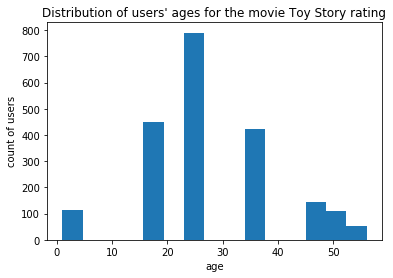

In [18]:
specific_movie_rating.age.plot.hist(bins=15)
plt.title("Distribution of users' ages for the movie Toy Story rating")
plt.ylabel('count of users')
plt.xlabel('age');

***
##### A function that given a user id and movie id , returns a list of user ids for other users that rated the movie identified by the provided movie id with the same score

In [19]:
def similar_user_rating(user_id, movie_id):
    movie_user_rating = data[(data['movie_id']== movie_id)  & (data['user_id']==user_id)]
    score = movie_user_rating['rating'].values[0]
    user_movie_score = data[(data['movie_id']== movie_id)  & (data['rating']==score)]['user_id']
    df = pd.DataFrame(user_movie_score)
    df.style
    print(df)

In [20]:
similar_user_rating(1, 1193)

      user_id
0           1
1           2
4          17
6          19
7          24
9          33
10         39
16         53
17         54
18         58
22         81
23         88
24         89
25         95
28        102
30        107
32        120
33        123
34        131
38        150
40        155
41        166
42        169
43        175
45        180
46        190
49        195
53        208
60        235
61        236
...       ...
1668     5859
1669     5865
1670     5868
1674     5888
1676     5890
1682     5911
1684     5917
1685     5920
1687     5924
1690     5942
1693     5948
1694     5949
1695     5950
1697     5954
1698     5956
1699     5958
1700     5962
1701     5964
1702     5965
1706     5975
1708     5977
1709     5978
1712     5986
1714     6001
1715     6002
1718     6021
1719     6032
1720     6033
1721     6035
1722     6036

[937 rows x 1 columns]


***
###### we can use the pivot_table method to get mean movie ratings for each film grouped by gender. And further plot the difference of mean ratings beetween the genders. 

In [21]:
mean_ratings = data.pivot_table('rating', index=['movie_id','title'], columns='gender', aggfunc='mean')

In [22]:
mean_ratings[:5]

,gender,F,M
movie_id,title,,
1,Toy Story (1995),4.187817,4.130552
2,Jumanji (1995),3.278409,3.175238
3,Grumpier Old Men (1995),3.073529,2.994152
4,Waiting to Exhale (1995),2.976471,2.482353
5,Father of the Bride Part II (1995),3.212963,2.888298


We group the movies by title and filter the top 50 movies sorted by the number of reviews received. 

In [23]:
ratings_by_title = data.groupby('movie_id').size().sort_values(ascending=False)[:50]

In [25]:
mean_ratings.reset_index('movie_id', inplace=True)

In [26]:
mean_ratings[:5]

gender,movie_id,F,M
title,,,
Toy Story (1995),1,4.187817,4.130552
Jumanji (1995),2,3.278409,3.175238
Grumpier Old Men (1995),3,3.073529,2.994152
Waiting to Exhale (1995),4,2.976471,2.482353
Father of the Bride Part II (1995),5,3.212963,2.888298


To see the top films among female viewers, we can sort by the F column in descending order:

In [27]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [28]:
top_female_ratings[:10]

gender,movie_id,F,M
title,,,
Lamerica (1994),53,5.0,4.666667
"Other Side of Sunday, The (S�ndagsengler) (1996)",3817,5.0,2.928571
Message to Love: The Isle of Wight Festival (1996),1420,5.0,3.833333
Belly (1998),2332,5.0,3.000000
"Saltmen of Tibet, The (1997)",2129,5.0,3.571429
"Big Combo, The (1955)",3292,5.0,3.600000
Battling Butler (1926),3012,5.0,3.222222
Prisoner of the Mountains (Kavkazsky Plennik) (1996),1450,5.0,3.692308
24 7: Twenty Four Seven (1997),2444,5.0,3.750000


Likewise, for males:

In [29]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)

In [30]:
top_male_ratings[:10]

gender,movie_id,F,M
title,,,
"Gate of Heavenly Peace, The (1995)",787,5.000000,5.0
Small Wonders (1996),985,3.333333,5.0
Smashing Time (1967),3233,NaN,5.0
"Baby, The (1973)",3280,NaN,5.0
Ulysses (Ulisse) (1954),3172,NaN,5.0
Dangerous Game (1993),439,4.000000,5.0
Angela (1995),130,3.000000,5.0
Lured (1947),3656,NaN,5.0
Follow the Bitch (1998),1830,NaN,5.0


***
###### To find the movies that are most divisive between male and female viewers, we add a column to *mean_ratings* containing the difference in means of the female and male viewer ratings, then sort by that

In [31]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

Sorting by 'diff' gives us the movies with the greatest rating difference and which were preferred by women:

In [32]:
sorted_by_diff = mean_ratings.sort_values(by='diff')[:50]

In [33]:
sorted_by_diff[:50]

gender,movie_id,F,M,diff
title,,,,
"James Dean Story, The (1957)",3136,4.000000,1.000000,-3.000000
Country Life (1994),687,5.000000,2.000000,-3.000000
"Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)",2823,4.000000,1.000000,-3.000000
Babyfever (1994),776,3.666667,1.000000,-2.666667
"Woman of Paris, A (1923)",3641,5.000000,2.428571,-2.571429
Cobra (1925),2777,4.000000,1.500000,-2.500000
"Other Side of Sunday, The (S�ndagsengler) (1996)",3817,5.000000,2.928571,-2.071429
Belly (1998),2332,5.000000,3.000000,-2.000000
Mad Dog Time (1996),1313,4.000000,2.000000,-2.000000


Reversing the order of the rows and again slicing off the top 10 rows, we get the movies preferred by men that women didn’t rate highly:


In [34]:
sorted_by_diff[::-1][:10]

gender,movie_id,F,M,diff
title,,,,
Phantasm IV: Oblivion (1998),3839,3.750000,2.410256,-1.339744
"Flower of My Secret, The (La Flor de Mi Secreto) (1995)",617,4.600000,3.250000,-1.350000
Blood Beach (1981),1335,3.000000,1.650000,-1.350000
"Brother, Can You Spare a Dime? (1975)",2981,5.000000,3.642857,-1.357143
You So Crazy (1994),411,3.666667,2.300000,-1.366667
Nobody Loves Me (Keiner liebt mich) (1994),106,4.500000,3.125000,-1.375000
"Big Combo, The (1955)",3292,5.000000,3.600000,-1.400000
Original Gangstas (1996),732,4.000000,2.600000,-1.400000
Coldblooded (1995),394,5.000000,3.588235,-1.411765


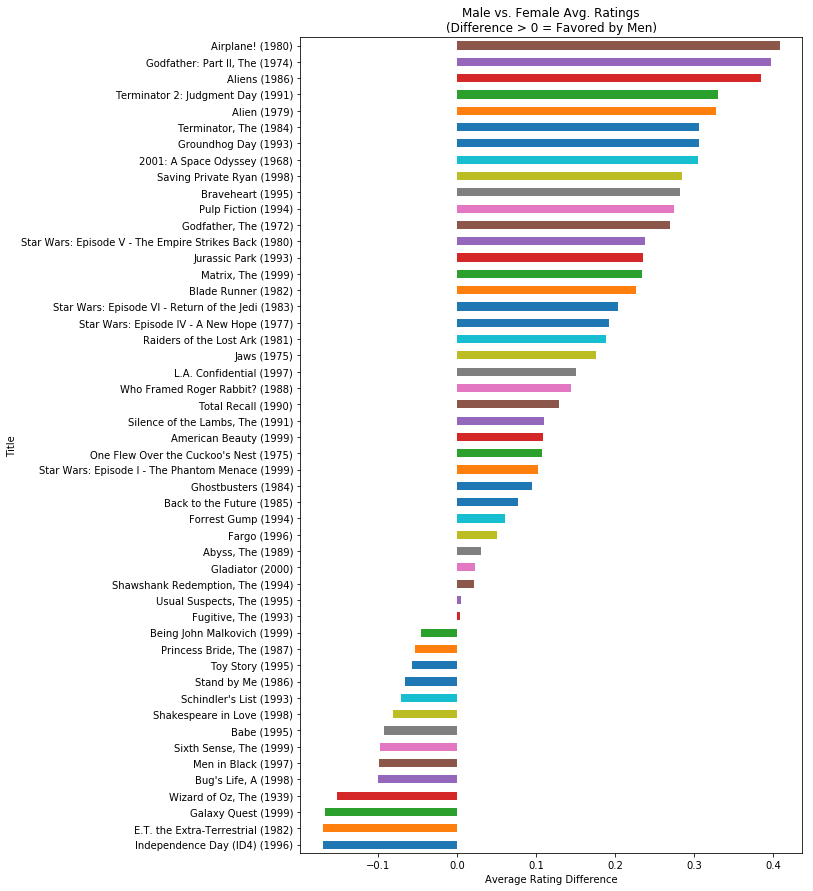

In [38]:
disagreements = mean_ratings[mean_ratings.movie_id.isin(ratings_by_title.index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');

***
References

http://localhost:8888/notebooks/Suhani/Fall%202018/DMT/cs6220/M01-A01-%20Movie%20Rating.ipynb#

http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/